# Exploring MNE Data Structure

We will load a raw EEG data file using MNE and gain an understanding of how MNE stores data.

This is an important first step to working with data in MNE.

## Install MNE Library

In [ ]:
# install MNE module
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 66.5 MB/s eta 0:00:00


## Upload EEG Data Files

In [42]:
# import EEG data files
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vhdr
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.eeg
!wget https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vmrk

--2026-01-01 11:02:40--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.vhdr
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3876 (3.8K) [application/octet-stream]
Saving to: ‘N400_dataset_04.vhdr’

N400_dataset_04.vhd 100%[===================>]   3.79K  --.-KB/s    in 0s      

2026-01-01 11:02:41 (96.9 MB/s) - ‘N400_dataset_04.vhdr’ saved [3876/3876]

--2026-01-01 11:02:41--  https://datascience.faseela.ma/wp-content/uploads/data-science/N400_dataset_04.eeg
Resolving datascience.faseela.ma (datascience.faseela.ma)... 169.60.78.87
Connecting to datascience.faseela.ma (datascience.faseela.ma)|169.60.78.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43685760 (42M) [application/octet-stream]
Saving to: ‘N400_dataset_04.eeg’

N400_dataset_04.eeg 100%[=====

## Import Libraries

In [ ]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

## Load Raw Data

EEG raw data is typically stored in a one or more files containing continuous EEG data.

There are many different proprietary file formats for EEG data; most of these are developed by the manufacturer of a particular EEG system, since an integral part of an EEG system is software to save the data for later analysis.

The MNE library provides functions to import data from most common EEG systems.

In this course, we will be working with data from a system sold by Brain Products, whose software is called Brain Vision.

So we will use MNE **`read_raw_brainvision()`** function.

An EEG recording consists of three separate files:

* **Header file (*.vhdr):** This is a text file containing recording parameters and further meta-information. It has the same base name as the raw EEG data file.
* **Marker file (*.vmrk):** This is a text file describing the events that have been collected during the EEG data recording. It has the same base name as the raw EEG data file.
* **Raw EEG data file (*.eeg):** This is a binary file containing the EEG data as well as additional signals recorded along with the EEG.

When we call the **`read_raw_brainvision()`** function, we pass the `.vhdr` file as argument.

Since it specifies the names of the associated `.eeg` and `.vmrk` files, from this file MNE can find the data and markers.

In [44]:
# load raw data
raw = mne.io.read_raw_brainvision('N400_dataset_04.vhdr')

## View raw data attributes

We now have the raw EEG data represented in Python as an MNE **`Raw`** object

We can view its basic information by using the `.info` property:

In [28]:
# view raw data attributes
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, C3, P3, TP9, Fz, Cz, Fp2, F4, F8, C4, P4, TP10, Pz, Oz
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2000-01-31 10:37:08 UTC
 nchan: 16
 projs: []
 sfreq: 500.0 Hz
>

## **`Raw`** Object Info

We can use the **`keys()`** method to see all of the fields available in **`info`** object:

In [45]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_head_t', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'ch_names', 'nchan'])

We can access the values stored with any of these info attributes. The following command shows the names of all of the channels (electrodes) in the data set:

In [46]:
raw_info = raw.info['ch_names']
print(raw_info)

['Fp1', 'F3', 'F7', 'C3', 'P3', 'TP9', 'Fz', 'Cz', 'Fp2', 'F4', 'F8', 'C4', 'P4', 'TP10', 'Pz', 'Oz']


Any Python object has an atrribute **`__dict__`** that contains a dictionary of all of the object’s attributes, with keys being the attribute names, and values being the information stored for that attribute.

In [47]:
raw_dict = raw.__dict__
print(raw_dict)

{'preload': False, '_last_samps': array([682589]), '_first_samps': array([0]), 'info': <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, C3, P3, TP9, Fz, Cz, Fp2, F4, F8, C4, P4, TP10, Pz, Oz
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2000-03-08 09:05:29 UTC
 nchan: 16
 projs: []
 sfreq: 500.0 Hz
>, 'buffer_size_sec': 1.0, '_cals': array([4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
       4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
       4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08, 4.88281e-08,
       4.88281e-08]), '_raw_extras': [{'offsets': None, 'fmt': 'single', 'order': 'F', 'n_samples': 682590, 'orig_nchan': 16}], '_read_picks': [array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])], '_read_comp_grade': None, '_comp': None, '_filenames': [PosixPath('/content/N400_dataset_04.eeg')], 'orig_format': 'single', '_orig_units': {'Fp1': 'µV', 'F3': 'µV', 'F7': 'µV'

## Raw EEG Data

By default, MNE’s routines to read raw data read the data file’s header into memory, but not the data itself.

The reason for this is that data files are often quite large, and so reading them in sometimes takes a noticeable amount of time, and consume significant memory.

The header of a raw EEG data file contains its metadata (information about the file), as you saw above in printing out the **`__dict__`** this is often enough for MNE to perform some operations on the data.

At some point, if you want to perform operations on the EEG data, then MNE will automatically load in the data to work on it.

The fact that the data is not loaded is indicated in the **`__dict__`** output above by the first dictionary entry: `preload: False`.

We can ask MNE to load the data using the **`load_data()`** method, as shown below.

Alternatively, when we originally read the raw data file, we could have told MNE to load the data with the **`preload`** keyword argument, as follows:

In [48]:
raw = mne.io.read_raw_brainvision('N400_dataset_04.vhdr', preload='True')

The **`raw`** object has a **`_data`** attribute, containing a NumPy array:

In [49]:
print(type(raw._data))

<class 'numpy.memmap'>


MNE represents the data as a 2D array with a row for each channel, and columns for time points.

The shape attribute of the **`raw._data`** array informs on the number of channels and time points in the raw data:

In [50]:
print(raw._data.shape)

(16, 682590)


One challenge in working with the raw data directly in this way, is that each time point in the continuous data is not necessarily a multiple of 1 ms.

When EEG data is recorded, the continuous data is sampled (measured) at a particular rate, called the sampling frequency.

This is the number of measurements per second.

We can see the sampling rate of an MNE dataset by accessing the **`sfreq`** property of the **`info`** attribute:

In [51]:
raw.info['sfreq']

500.0

So our data were sampled at 500 Hz, meaning that there are 500 measurements per second.

This means that each measurement is 1/500th of a second, or 2 ms.

So we can derive the length of the EEG recording, in seconds, by dividing the number of time points by the sampling rate:

In [52]:
scan_duration = raw._data.shape[1] / raw.info['sfreq']
print('Duration of EEG recording = ', scan_duration, 's, or', round(scan_duration / 60, 2), 'min.')

Duration of EEG recording =  1365.18 s, or 22.75 min.


## Accessing subsets of data

Since the data is stored as a NumPy array, we can access specific data points using standard indexing.

For example, if we wanted to select all of the data from only channel 15 (Oz), we would use:

In [53]:
print(raw._data[15, :])

[-3.49426091e-05 -3.36795634e-05 -2.86693426e-05 ... -3.19992683e-01
 -3.19929304e-01 -3.19865950e-01]


## Slicing the Data in Time

The **`get_data()`** method of the **`Raw`** object allows to slice the data by specifying the time range we want, in seconds, and it will return the data in that time range.

We can use the **`tmin`** and **`tmax`** keyword arguments to specify the time range, and the **`picks`** keyword argument to specify the channels using their 10-10 system labels, rather than needing to know which row in the data array corresponds to which channel.

For example, to get the data from channel Oz, from 1000 - 1100 ms, we can use:

In [54]:
raw.get_data(picks='Oz', tmin=1.0, tmax=1.1)

array([[-2.49801508e-05, -2.19871408e-05, -1.94038292e-05,
        -1.67575750e-05, -1.30355768e-05, -9.58785520e-06,
        -8.58840503e-06, -9.20867448e-06, -9.49210635e-06,
        -8.51211112e-06, -6.51931429e-06, -5.29403415e-06,
        -5.59081745e-06, -7.73238740e-06, -1.30371027e-05,
        -1.94000145e-05, -2.23392372e-05, -2.12985883e-05,
        -1.95117851e-05, -1.89590357e-05, -1.81915190e-05,
        -1.58920207e-05, -1.38889242e-05, -1.46545335e-05,
        -1.87972926e-05, -2.40486022e-05, -2.53547539e-05,
        -2.11994063e-05, -1.70558842e-05, -1.67198096e-05,
        -1.81903746e-05, -1.99851887e-05, -2.23621254e-05,
        -2.39189025e-05, -2.26089362e-05, -1.85237790e-05,
        -1.32762841e-05, -9.05341639e-06, -9.11864767e-06,
        -1.52908247e-05, -2.43644590e-05, -3.05766903e-05,
        -3.11122735e-05, -2.77068950e-05, -2.55248893e-05,
        -2.87875982e-05, -3.58024414e-05, -4.20131468e-05,
        -4.56767802e-05, -4.71091983e-05]])

## Visualizing Raw EEG Data

### Plot EEG Data with Matplotlib

We will use Matplotlib to visualize the electrical potential of a specific electrode over a segment of time.

We use the **`.T`** operator to transposes the data array (i.e., transform a row vector into a column vector).

Text(0, 0.5, 'Voltage ( $\\mu V$ )')

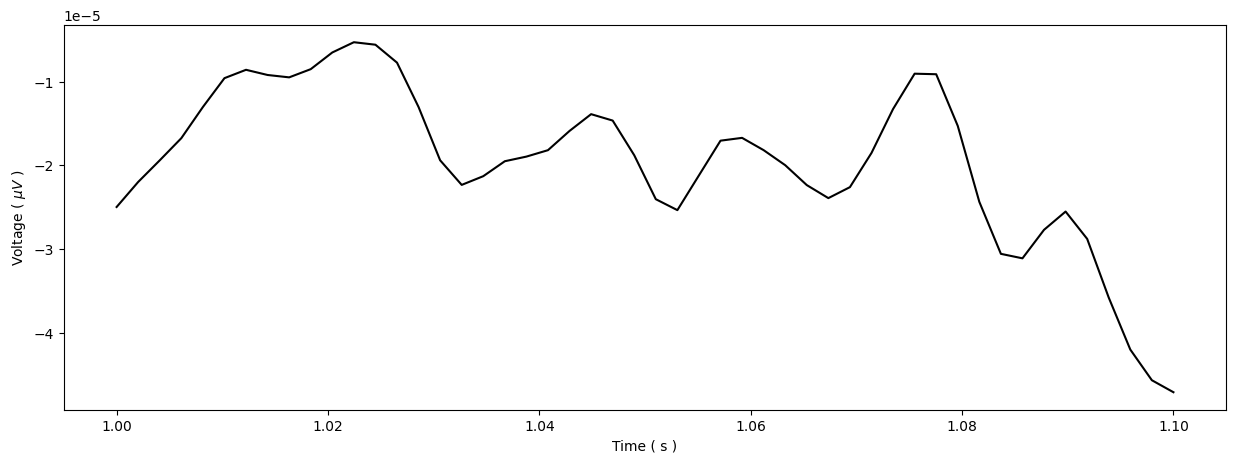

In [55]:
# set channel and time interval
channel = 'Oz'
start_time = 1.0    # in seconds
end_time = 1.1

# Get the data from channel Oz, from 1000 - 1100 ms
data = raw.get_data(picks=channel, tmin=start_time, tmax=end_time).T

# Get the time values for x-axis
times = np.linspace(start_time, end_time, num=data.shape[0])

# Plot the data
fig, ax = plt.subplots(figsize=[15, 5])
ax.plot(times, data, color='black')

# Label the axes
plt.xlabel('Time ( s )')
plt.ylabel(r"Voltage ( $\mu V$ )")

## Summary

MNE can load raw EEG data from standard file formats, and stores the data in a **`Raw`** object.

The **`Raw`** object contains a lot of information about the data (metadata), but does not load the data into memory by default.

The metadata can be accessed using the **`info`** attribute of the **`Raw`** object. Many other attribues fo the **`Raw`** object are visible using the **`__dict__ `** attribute.

By default, MNE does not load the data into memory. We can load it either with the **`preload`** keyword argument when reading the data, or by calling the .**`load_data()`** method of the **`Raw`** object.

Since the raw data is stored in a NumPy array, we can access subsets of the data using standard NumPy indexing.

Likewise, we can use Matpltlib to plot data from the NumPy array. When plotting a 1D NumPy array, we need to transpose it first, using the **`.T`** operator.